In [1]:
# kütüphaneler import edildi
    
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# burada bir dizi csv dosyası okunarak her biri dataframe e yüklendi.
# Encoding: karakter kodlamasını belirtir.

median_house_hold_in_come=pd.read_csv("C:/Users/PC/Desktop/veri_gorsellestıirme/MedianHouseholdIncome2015.csv",encoding="windows-1252")
percentage_people_below_poverty_level=pd.read_csv("C:/Users/PC/Desktop/veri_gorsellestıirme/PercentagePeopleBelowPovertyLevel.csv",encoding="windows-1252")
percent_over_25_completed_highSchool=pd.read_csv("C:/Users/PC/Desktop/veri_gorsellestıirme/PercentOver25CompletedHighSchool.csv",encoding="windows-1252")
share_race_city=pd.read_csv("C:/Users/PC/Desktop/veri_gorsellestıirme/ShareRaceByCity.csv",encoding="windows-1252")
null= pd.read_csv("C:/Users/PC/Desktop/veri_gorsellestıirme/PoliceKillingsUS.csv",encoding="windows-1252")

In [3]:
# burada CVS dosyasını okuyup, karakter kodlamasını latin1 olarak kodladım.
percentage_people_below_poverty_rate = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding='latin1')

In [4]:
# info metodu ile verilen dataframe nin genel bilgilerini gördük
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


# BAR PLOT

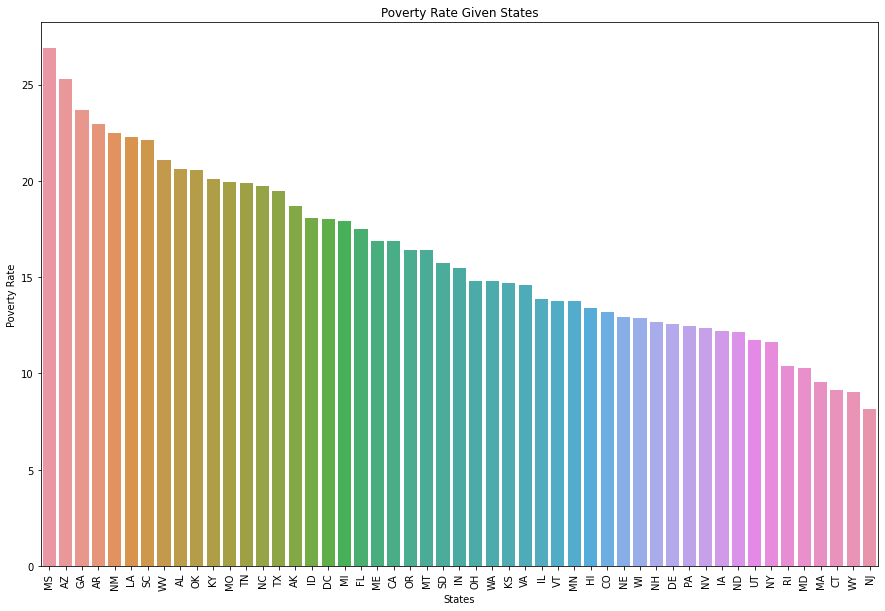

In [5]:
percentage_people_below_poverty_rate.replace(["-"], 0.0, inplace=True)
percentage_people_below_poverty_rate['poverty_rate'] = percentage_people_below_poverty_rate['poverty_rate'].astype(float)

area_list = list(percentage_people_below_poverty_rate['Geographic Area'].unique())
area_poverty_ratio = []

for area in area_list:
    x = percentage_people_below_poverty_rate[percentage_people_below_poverty_rate['Geographic Area'] == area]
    area_poverty_rate = sum(x.poverty_rate) / len(x)
    area_poverty_ratio.append(area_poverty_rate)

data = pd.DataFrame({'area_list': area_list, 'area_poverty_ratio': area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index) 

plt.figure(figsize=(15,10))# genişlik 15, yükseklik 10 birim olacak şekilde  bir figür oluştur.
ax = sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])# verileri dataframeden alır.
plt.xticks(rotation=90)
plt.xlabel('States')# x ekseninin başlığını yazdır.
plt.ylabel('Poverty Rate')# y ekseninin etiketini yazdır
plt.title('Poverty Rate Given States')#ana başlığı yazdır
plt.show() # oluşturulan grafiği görüntüle


# BAR PLOT -2

In [6]:
# burada kill data setini kullanacağız.  öldürülen insanların isimleri ve soyisimleri arasında en çok kullanılan ilk 15 
#taneye bakacağız.  bu data setinde TK  TKdemek:  isimleri olmayanlar


In [7]:
null= pd.read_csv("C:/Users/PC/Desktop/veri_gorsellestıirme/PoliceKillingsUS.csv",encoding='latin1')
null= pd.read_csv("C:/Users/PC/Desktop/veri_gorsellestıirme/PoliceKillingsUS.csv",encoding="windows-1252")

In [8]:
#Counter modülünü tanımladım
from collections import Counter 

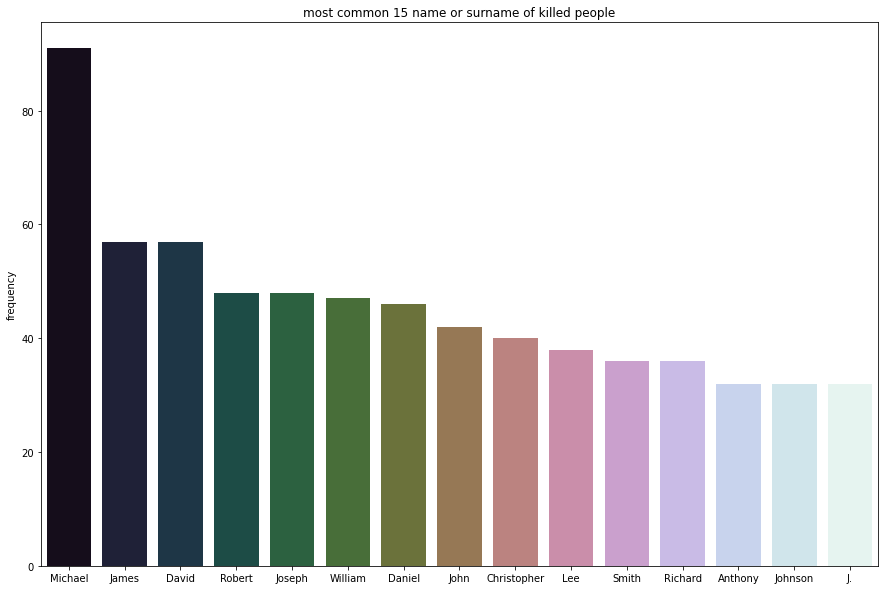

In [9]:
#separate=Kill.name!=['TK TK'].str.split()
filtered_data=null[null['name']!='TK TK']# null dataframesindeki name sütünundaki tk değerlerini filtrele
separate = filtered_data['name'].str.split()# name sütünundaki  her satırı boşluğa göre böl

name_list = [item for sublist in separate for item in sublist]# seperate listesindeki her isim ve soyismi tek tek listele

name_count=Counter(name_list)

most_common_names=name_count.most_common(15)
x,y=zip(*most_common_names)
x,y=list(x),list(y)

#GÖRSELLEŞTİRME
plt.figure(figsize=(15,10))
ax=sns.barplot(x=x,y=y,palette='cubehelix')
plt.xlabel=('name or surname of killed people')
plt.ylabel('frequency')
plt.title('most common 15 name or surname of killed people')
plt.show()

# BAR-PLOT3

In [10]:
#25  yaşından yaşlı popülasyonun lise mezunu olma oranı

In [11]:
percent_over_25_completed_highSchool=pd.read_csv("C:/Users/PC/Desktop/veri_gorsellestıirme/PercentOver25CompletedHighSchool.csv",encoding="windows-1252")
percent_over_25_completed_highSchool=pd.read_csv("C:/Users/PC/Desktop/veri_gorsellestıirme/PercentOver25CompletedHighSchool.csv",encoding='latin1')

TypeError: 'str' object is not callable

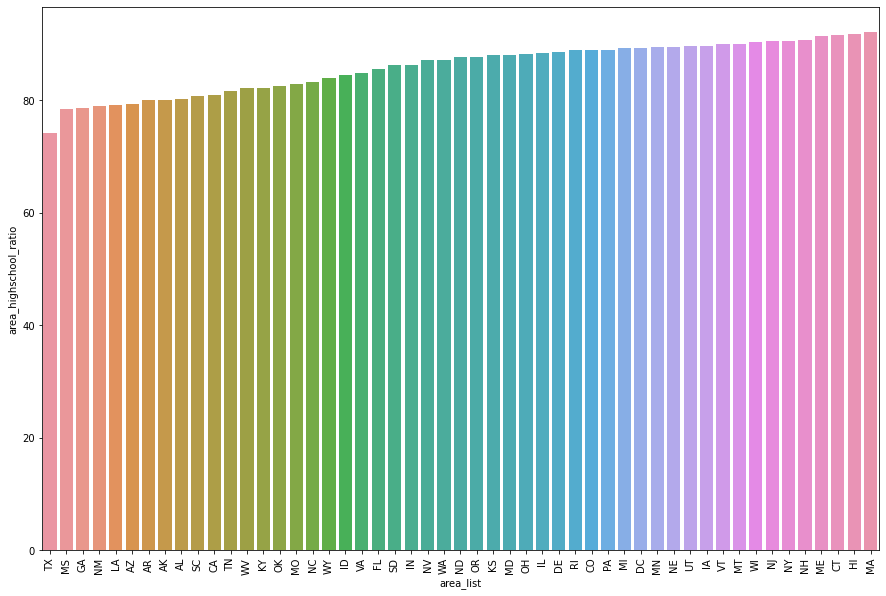

In [12]:
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace=True) # inplace= değişiklikleri orjinal dataframe üzerinde yap
percent_over_25_completed_highSchool.percent_completed_hs=percent_over_25_completed_highSchool.percent_completed_hs.astype(float)# astype: tip değişimi için kullanılan bir metottur.
area_list=list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool=[]
for i in area_list:
    x=percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate=sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
    
data=pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index=(data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2=data.reindex(new_index)

plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data2['area_list'],y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation=90)
plt.xlabel('States')
plt.ylabel('high school graduate rate')
plt.title('percentage of given state s population above 25 that has graduated high school')

# YATAY-BAR-PLOT

In [13]:
# soru şu : benim elimde bir çok ryalatim var. 
#ve ben bu eyaletlerdeki ırkları görselleştirmek istiyorum. örneğin bana newyorktaki ispanyol kökenlileri görselleştir.

share_race_city=pd.read_csv("C:/Users/PC/Desktop/veri_gorsellestıirme/ShareRaceByCity.csv",encoding="windows-1252")
share_race_city=pd.read_csv("C:/Users/PC/Desktop/veri_gorsellestıirme/ShareRaceByCity.csv",encoding="latin1")


[Text(0.5, 0, 'Percentage of Races'),
 Text(0, 0.5, 'States'),
 Text(0.5, 1.0, 'percentage of states population according to races')]

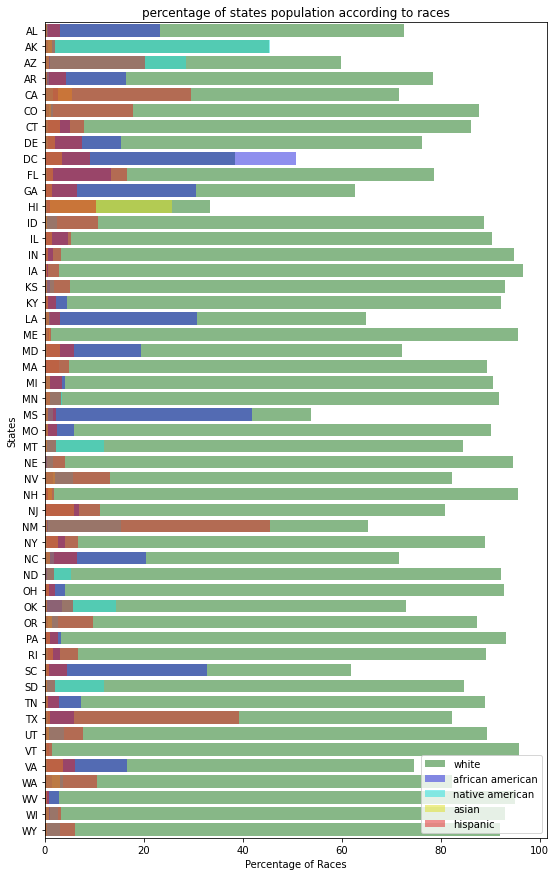

In [14]:
share_race_city.replace(['(X)'],0.0,inplace=True)

share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city[['share_white','share_black','share_native_american','share_asian','share_hispanic']]

#share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']]=share_race_city.loc['share_white','share_black','share_native_american','share_asian','share_hispanic']
area_list=list(share_race_city['Geographic area'].unique())
               
               #boş listeler oluştur
share_white=[]
share_black=[]
share_native_american=[]
share_asian=[]
share_hispanic=[]
            # string ve int değerler toplanmadığı için onları floata çevir
share_race_city['share_white'] = share_race_city['share_white'].astype(float)
share_race_city['share_black'] = share_race_city['share_black'].astype(float)
share_race_city['share_native_american'] = share_race_city['share_native_american'].astype(float)
share_race_city['share_asian'] = share_race_city['share_asian'].astype(float)
share_race_city['share_hispanic'] = share_race_city['share_hispanic'].astype(float)

for i in area_list:
    x =share_race_city[share_race_city['Geographic area']==i]
               

               # oranlarını bul ve boş olan listeye yaz
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black)/len(x))
    share_native_american.append(sum(x.share_native_american)/len(x))
    share_asian.append(sum(x.share_asian)/len(x))
    share_hispanic.append(sum(x.share_hispanic)/len(x))
               
               # görselleştirme
f,ax=plt.subplots(figsize=(9,15))

# x ekseni ırklar y ekseni ise eyaletler oluyor
sns.barplot(x=share_white,y=area_list,color='green',alpha=0.5,label='white')
sns.barplot(x=share_black,y=area_list,color='blue',alpha=0.5,label='african american')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha=0.5,label='native american')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha=0.5,label='asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha=0.5,label='hispanic')

               #legendların görünürlüğü(sağ alt köşedeki kutucuk)
ax.legend(loc='lower right',frameon=True)
ax.set(xlabel='Percentage of Races',ylabel='States',title='percentage of states population according to races')

# POİNT-PLOT

In [15]:
#her bir eyalleteki liseden mezun olma oranı ve fakirlik oranı nedir ? yani şöyle eğer kişinin liseden mezun olma oranı yüksekse 
#fakirlik oranının düşük olması beklenir

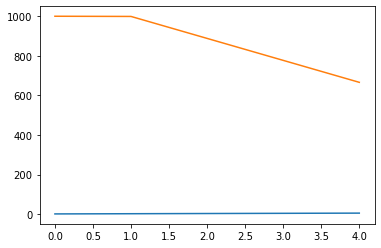

In [16]:
y1=[1,2,3,4,5]
y2=[1000,999,888,777,666]

#dizi boyutuna göre bir aralık tanımla
x=np.arange(len(y1))

plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [17]:
share_race_city=pd.read_csv("C:/Users/PC/Desktop/veri_gorsellestıirme/ShareRaceByCity.csv",encoding="windows-1252")
share_race_city=pd.read_csv("C:/Users/PC/Desktop/veri_gorsellestıirme/ShareRaceByCity.csv",encoding="latin1")

TypeError: 'str' object is not callable

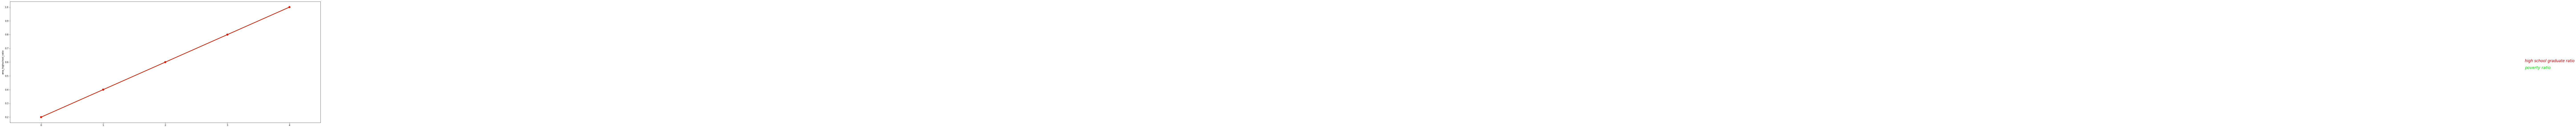

In [18]:
sorted_data = pd.DataFrame({'area_poverty_ratio': [0.1, 0.2, 0.3, 0.4, 0.5]})  # Örnek bir DataFrame oluşturma
sorted_data2 = pd.DataFrame({'area_highschool_ratio': [0.1, 0.2, 0.3, 0.4, 0.5]})  # Örnek bir DataFrame oluşturma


# eyaletlerin fakirlik sıralaması
sorted_data['area_poverty_ratio']=sorted_data['area_poverty_ratio']/max(sorted_data['area_poverty_ratio'])

#liseden mezun olma oranlarını gösteren data
sorted_data2['area_highschool_ratio']=sorted_data2['area_highschool_ratio']/max(sorted_data2['area_highschool_ratio'])

data=pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values('area_poverty_ratio',inplace=True)

f,ax1=plt.subplots(figsize=(25,10))
sns.pointplot(x=data.index,y='area_poverty_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x=data.index,y='area_highschool_ratio',data=data,color='red',alpha=0.8)
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize=17,style='italic')
plt.text(40,0.55,'poverty ratio',color='lime',fontsize=18,style='italic')
plt.xlabel('States ',fontsize=15,color='blue')
plt.ylabel('Values ',fontsize=15,color='blue')
plt.title('high school graduate vs poverty rate',fontsize=20,color='blue')
plt.grid()


# JOİN-PLOT

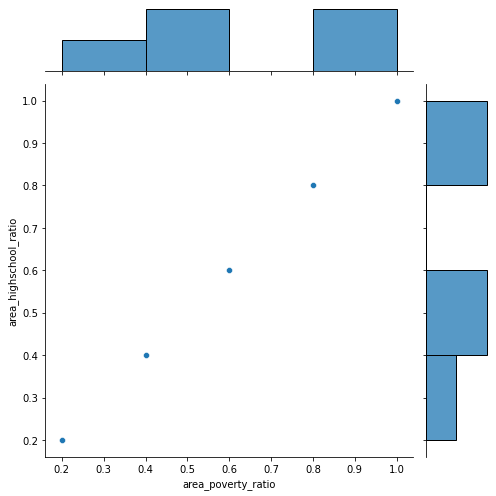

In [20]:
g = sns.jointplot(data=data, x='area_poverty_ratio', y='area_highschool_ratio', kind="scatter", height=7)
plt.show()

# JOİN-PLOT-2

In [22]:
g = sns.jointplot(x=data.area_poverty_ratio ,y=data.area_highschool_ratio, kind="light kde", size=8)
plt.show()

C:\Users\PC\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


ValueError: `kind` must be one of ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid'], but light kde was passed.`

# PİE-PLOT

In [23]:
# Bir kill data setim var ve ben bunlatın içinde öldürülen insanların oranlarını bulmak istiyorum

null= pd.read_csv("C:/Users/PC/Desktop/veri_gorsellestıirme/PoliceKillingsUS.csv",encoding="windows-1252")
null= pd.read_csv("C:/Users/PC/Desktop/veri_gorsellestıirme/PoliceKillingsUS.csv",encoding="latin-1")

In [24]:
#ırklarda boş olan yerler varsa eğer bunları sil demek.
kill=pd.read_csv("C:/Users/PC/Desktop/veri_gorsellestıirme/PoliceKillingsUS.csv")
kill.race.dropna(inplace=True)

#hangi ırktan kaç tane olduklarını bul  ve indekslerini al
labels=kill.race.value_counts().index

#totalde 6 tane ırk var ve ben 6 tane renk istiyorum
colors=['grey','blue','red','yellow','green','brown']
explode=[0,0,0,0,0]
sizes=kill.race.value_counts().values
plt.figure(figsize =(7,7))
plt.pie(sizes,explode=explode,color=colors,labels=labels,autopct='%1.1f%%')
plt.title('killed people according  to races',color='blue',fontsize=15)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 25272: invalid start byte

# LM-PLOT

In [25]:
#liseden mezun olma oranı ve fakirlik oranını kıyaslamak istiyorum.
#burada x ekseni yoksulluk y ekseni ise liseden mezun olma oranı olsun.

In [26]:
share_race_city=pd.read_csv("C:/Users/PC/Desktop/veri_gorsellestıirme/ShareRaceByCity.csv",encoding="windows-1252")
share_race_city=pd.read_csv("C:/Users/PC/Desktop/veri_gorsellestıirme/ShareRaceByCity.csv",encoding="latin1")

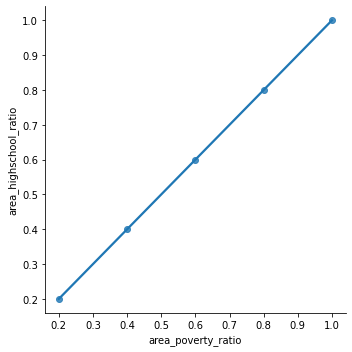

In [28]:
#Burada data=data dedikten sonra seaborn onları string şeklinde yazmamıza izin veriyor. ve çizilen plot datanın tam ortasından geçmeye çalışıyor
sns.lmplot(x="area_poverty_ratio",y="area_highschool_ratio",data=data)
plt.show()

# KDE-PLOT

In [29]:
#Liseden mezun olma oranı ve fakirlik oranına bak. burada x ekseni fakirlik oranı y ekseni ise liseden mezun olma oranı.
#shade: en içteki kısım demek false yaptığın takdirde en içteki kısın boş görünecek

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


LinAlgError: singular matrix

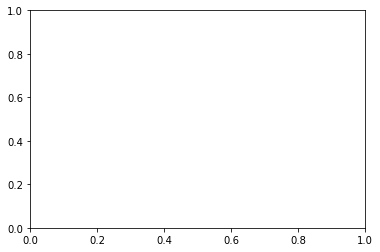

In [31]:
sns.kdeplot(data.area_poverty_ratio,data.area_highschool_ratio,shade=True,cut=5)# cut: büyüklük
plt.show()

# VİOLİN-PLOT

In [32]:
#SORU: Liseden mezun olma oranı ve fakirlik oranları

In [33]:
#violin : plot değerlerin dağılımına bakıyor
#pal: pelet demek sadece ikisinin rengini veren şey
#inner points:şeklin içindeki noktalar demektir.bu noktaların her biri benim data pointim.
#violin plot: listenin/datanın içindeki en yüksek olanları en şişman şekilde gösteriyor

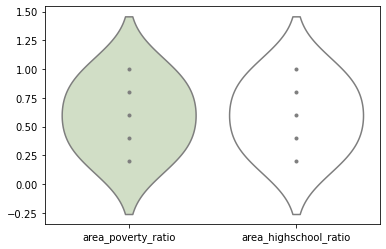

In [38]:
pal=sns.cubehelix_palette(2,rot=-.5,dark=23)
sns.violinplot(data=data,palette=pal,inner="points")
plt.show()

# HEATMAP

In [39]:
#HEATMAP:Genellikle data içinde korelasyon  yapmak yani orantı için kullanılır.

In [40]:
#SORU: Liseden mezun olma ve fakirlik oranı arasındaki ilişkiyi göster

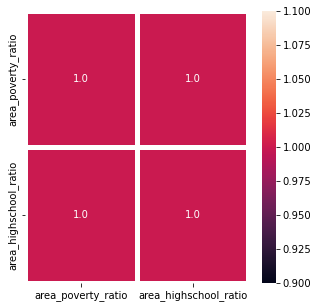

In [42]:
f,ax=plt.subplots(figsize=(5,5))

#annot:kareler içindeki sayıların gözükmesi
#linewidths:kareler arasındaki çizginin kalınlığı
#ax=ax: bir üst satırda yarattığım plotu heatmap ın içine koy
sns.heatmap(data.corr(),annot=True,linewidths=5,fmt='.1f',ax=ax)
plt.show()

# BOX-PLOT

In [59]:
#ölüm şekillerine göre sınıflandır burada sadece 5 farklı kişi için bir plot çizilmiş

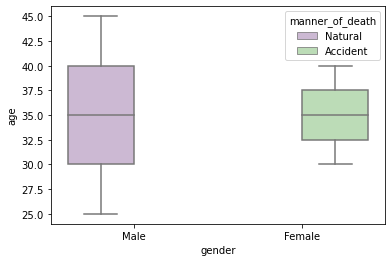

In [60]:
data = {
    "gender": ["Male", "Female", "Male", "Female", "Male"],
    "age": [25, 30, 35, 40, 45,],
    "manner_of_death": ["Natural", "Accident", "Natural", "Accident", "Natural"]
}
Kill = pd.DataFrame(data)
sns.boxplot(x="gender",y="age",hue="manner_of_death",data=Kill,palette="PRGn")#PRGn 2 farklı rengi bir araya getiren bir palet
plt.show()

# SWARM-PLOT

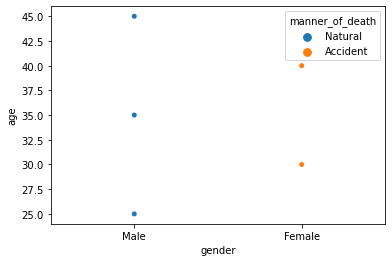

In [54]:
sns.swarmplot(x="gender",y="age",hue="manner_of_death",data=Kill)
plt.show()

# PAİR-PLOT

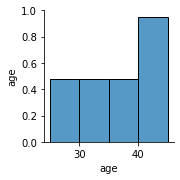

In [62]:
sns.pairplot(Kill)
plt.show()

# COUNT-PLOT

In [67]:
#SORU:cinsiyete göre ölüm oranları

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'gender')

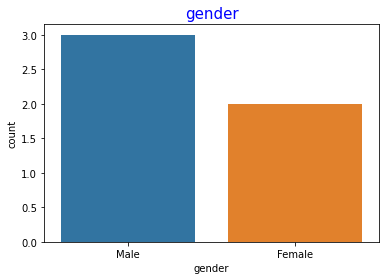

In [68]:
sns.countplot(Kill.gender)
plt.title("gender",color="blue",fontsize=15)

# COUNT-PLOT-2

In [69]:
#Kim neyle öldürülmüş ben bunu görselleştirmek istiyorum

TypeError: 'str' object is not callable

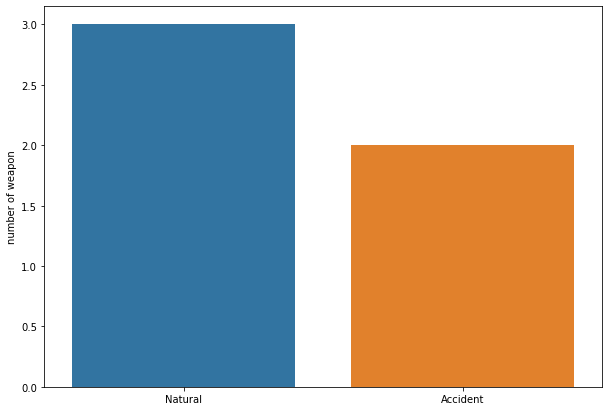

In [74]:
manner_of_death=Kill.manner_of_death.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=manner_of_death[:7].index,y=manner_of_death[:7].values)
plt.ylabel("number of weapon")
plt.xlabel("weapon Types")
plt.title("kill weapon ",color='blue',fontsize=15)

In [75]:
# öldürülen insanların yaşı için ne yapabilirim

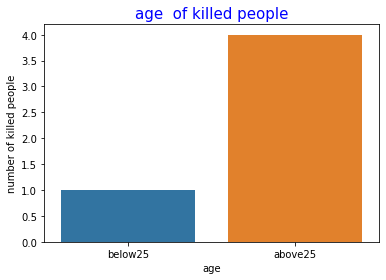

In [78]:
above25=['above25' if i >25 else 'below25' for i in Kill.age]
df=pd.DataFrame({'age':above25})
sns.countplot(x=df.age)
plt.ylabel('number of killed people')
plt.title('age  of killed people', color='blue',fontsize=15)
plt.show()